# Word statistics on open source in environmental sustainability

## Ideas and ToDo
Compare with: https://blogs.reading.ac.uk/weather-and-climate-at-reading/2021/whats-that-data-why-and-how-the-geoscientific-community-is-forging-metadata-standards/
https://github.com/sadielbartholomew/cf-standard-names-linguistics
https://sadielbartholomew.github.io/cf-standard-names-linguistics/

In [30]:
!pip install nltk pandas yake multi_rake wordcloud

In [31]:
import requests
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

URL = "https://ost.ecosyste.ms/api/v1/projects?reviewed=true&per_page=3000"
FILE_TO_SAVE_AS = "projects.json" # the name you want to save file as


resp = requests.get(URL) # making requests to server

with open(FILE_TO_SAVE_AS, "wb") as f: # opening a file handler to create new file
    f.write(resp.content) # writing content to file

In [32]:
raw = pd.read_json(resp.content.decode())
print(raw.shape)
raw.head()

(1993, 30)


,id,name,description,url,last_synced_at,repository,owner,packages,commits,issues_stats,events,keywords,dependencies,score,created_at,updated_at,avatar_url,language,category,sub_category,monthly_downloads,readme,funding_links,readme_doi_urls,works,citation_counts,total_citations,keywords_from_contributors,project_url,html_url
0,114061,cmocean,Colormap setup for standardizing commonly-plot...,https://github.com/matplotlib/cmocean,2024-07-07 13:34:30.070000+00:00,"{'id': 28577265, 'uuid': '32095153', 'full_nam...","{'login': 'matplotlib', 'name': 'Matplotlib De...","[{'id': 2673889, 'name': 'cmocean', 'ecosystem...","{'full_name': 'matplotlib/cmocean', 'default_b...","{'full_name': 'matplotlib/cmocean', 'html_url'...","{'total': {'ForkEvent': 56, 'CreateEvent': 30,...",[],"[{'ecosystem': 'pypi', 'filepath': 'requiremen...",18.919363,2023-10-11 00:08:50.545000+00:00,2024-07-08 14:03:30.286000+00:00,https://github.com/matplotlib.png,Python,Hydrosphere,Ocean and Hydrology Data Access,34828,cmocean\n=======\n\n[![Build Status](https://i...,[],[],{},{},0,"[reporting, parallel, meshing, measur, project...",https://ost.ecosyste.ms/api/v1/projects/114061,https://ost.ecosyste.ms/projects/114061
1,76815,TrapTagger,AI-Powered Camera-Trap Imagery Processing.,https://github.com/wildeyeconservation/traptagger,2024-07-07 13:34:32.439000+00:00,"{'id': 37577885, 'uuid': '479335428', 'full_na...","{'login': 'WildEyeConservation', 'name': 'Wild...",[],{'full_name': 'WildEyeConservation/TrapTagger'...,{'full_name': 'WildEyeConservation/TrapTagger'...,"{'total': {'IssuesEvent': 4, 'WatchEvent': 21,...","[camera-traps, computer-vision, conservation, ...","[{'ecosystem': 'docker', 'filepath': 'docker-c...",4.744932,2023-09-19 00:02:42.361000+00:00,2024-07-08 14:03:30.096000+00:00,https://github.com/WildEyeConservation.png,JavaScript,Biosphere,Terrestrial Animals,0,![WildEye Conservation Logo](https://wildeyeco...,[],[],{},{},0,[],https://ost.ecosyste.ms/api/v1/projects/76815,https://ost.ecosyste.ms/projects/76815
2,81451,OPEM,A modeling tool for evaluating the performance...,https://github.com/ecsim/opem,2024-07-07 13:34:32.545000+00:00,"{'id': 27805219, 'uuid': '114471494', 'full_na...","{'login': 'ECSIM', 'name': 'ECSIM', 'uuid': '3...","[{'id': 2839334, 'name': 'opem', 'ecosystem': ...","{'full_name': 'ECSIM/opem', 'default_branch': ...","{'full_name': 'ECSIM/opem', 'html_url': 'https...","{'total': {'ForkEvent': 63, 'CreateEvent': 139...","[chemistry, dynamic-analysis, electrochemistry...","[{'ecosystem': 'actions', 'filepath': '.github...",12.572402,2023-09-19 11:39:35.203000+00:00,2024-07-08 14:03:30.075000+00:00,https://github.com/ECSIM.png,Python,Energy Storage,Hydrogen,157,"<div align=""center"">\n<img src=""https://github...",[https://www.ecsim.site/opem/donate.html],"[https://doi.org/10.3390/app9061066, https://d...",{'https://doi.org/10.3390/app9061066': {'id': ...,"{'https://doi.org/10.3390/app9061066': 19, 'ht...",23,"[measurements, pypi, mathematics, transforms, ...",https://ost.ecosyste.ms/api/v1/projects/81451,https://ost.ecosyste.ms/projects/81451
3,797,climlab,A Python package for process-oriented climate ...,https://github.com/climlab/climlab,2024-07-07 13:35:03.322000+00:00,"{'id': 21647342, 'uuid': '24968065', 'full_nam...","{'login': 'climlab', 'name': 'climlab', 'uuid'...","[{'id': 2672164, 'name': 'climlab', 'ecosystem...","{'full_name': 'climlab/climlab', 'default_bran...","{'full_name': 'climlab/climlab', 'html_url': '...","{'total': {'CreateEvent': 3, 'ReleaseEvent': 2...","[climate-model, climate-science, educational-s...","[{'ecosystem': 'pypi', 'filepath': 'setup.py',...",13.308538,2023-09-11 11:54:35.977000+00:00,2024-07-08 14:03:30.025000+00:00,https://github.com/climlab.png,Jupyter Notebook,Climate Change,Earth and Climate Modeling,161,=======\nclimlab\n=======\n\n|docs| |JOSS| |DO...,[],[https://doi.org/10.21105/joss.00659],{'https://doi.org/10.21105/joss.00659': {'id':...,{'https://doi.org/10.21105/joss.00659': 24},2

In [33]:
import pandas as pd
pd.set_option('display.max_columns',200)
pd.set_option('display.max_colwidth', 50)

#https://www.nltk.org/
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stpwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [34]:
len(raw)

1993

# 1. Goal: Reduce the list of topics below into subtopics


In [35]:
raw['category'].value_counts()

category
Biosphere                  285
Consumption                269
Climate Change             244
Energy Systems             208
Natural Resources          178
Sustainable Development    173
Hydrosphere                150
Renewable Energy           127
Atmosphere                 126
Emissions                   90
Industrial Ecology          57
Cryosphere                  51
Energy Storage              35
Name: count, dtype: int64

In [36]:
raw['sub_category'].value_counts()

sub_category
Energy Modeling and Optimization            118
Biodiversity and Species Distribution        84
Water Supply                                 81
Mobility and Transportation                  74
Buildings and Heating                        70
Soil and Land                                67
Agriculture and Nutrition                    65
Photovoltaics and Solar Energy               59
Freshwater and Hydrology                     59
Climate Data Processing and Analysis         57
Forest Observation and Management            56
Computation and Communication                55
Meteorological Observation and Forecast      54
Earth and Climate Modeling                   54
Marine Life and Fishery                      50
Emission Observation and Modeling            47
Natural Hazard and Storm                     47
Data Catalogs and Interfaces                 45
Energy Distribution and Grids                43
Climate Data Access and Visualization        43
Wind Energy                

In [37]:
# looking into Energy Systems
raw[raw.category == 'Energy Systems'].sub_category.value_counts()

sub_category
Energy Modeling and Optimization    118
Energy Distribution and Grids        43
Energy System Data Access            30
Energy Monitoring and Management     17
Name: count, dtype: int64

In [38]:
df = raw[['name','description','category','sub_category','owner','readme']]
df.head()

,name,description,category,sub_category,owner,readme
0,cmocean,Colormap setup for standardizing commonly-plot...,Hydrosphere,Ocean and Hydrology Data Access,"{'login': 'matplotlib', 'name': 'Matplotlib De...",cmocean\n=======\n\n[![Build Status](https://i...
1,TrapTagger,AI-Powered Camera-Trap Imagery Processing.,Biosphere,Terrestrial Animals,"{'login': 'WildEyeConservation', 'name': 'Wild...",![WildEye Conservation Logo](https://wildeyeco...
2,OPEM,A modeling tool for evaluating the performance...,Energy Storage,Hydrogen,"{'login': 'ECSIM', 'name': 'ECSIM', 'uuid': '3...","<div align=""center"">\n<img src=""https://github..."
3,climlab,A Python package for process-oriented climate ...,Climate Change,Earth and Climate Modeling,"{'login': 'climlab', 'name': 'climlab', 'uuid'...",=======\nclimlab\n=======\n\n|docs| |JOSS| |DO...
4,FINE,"Provides a framework for modeling, optimizing ...",Energy Systems,Energy Modeling and Optimization,"{'login': 'FZJ-IEK3-VSA', 'name': 'FZJ-IEK3', ...",<!-- markdownlint-disable line-length no-inlin...


# 2. Sample Row

In [39]:
import re
import yake

In [40]:
# Removing words
words_black_list = ['python','pvlib','projects','affiliated','http','readthedocs','benchmarks','license','matlab','user','guide','html','https','open','source','journal',
                    'latest','release','build','publications','conda','installed','google','documentation','please']

## Yake for keyword Extraction
* Using our sample text, we will apply Yake's keyword extraction algorithm

## Rake for keyword Extracion

In [41]:
from multi_rake import Rake

## KeyBERT for keyword extraction
* Using our sample text, we will apply Yake's keyword extraction algorithm

In [42]:
#from keybert import KeyBERT

In [43]:
#kw_model = KeyBERT('distilbert-base-nli-mean-tokens')

# 3. Cleaning Full Dataset

In [44]:
# Fill null values with 'None'. This will allow us to concatenate the relevant text columns
df = df.fillna('None')

In [45]:
# Combine text columns - before was here just the description col in combined
cols_to_combine = ['name','description','category','sub_category','readme']
df['combined'] = df[cols_to_combine].agg(' '.join, axis=1)
df.head()

,name,description,category,sub_category,owner,readme,combined
0,cmocean,Colormap setup for standardizing commonly-plot...,Hydrosphere,Ocean and Hydrology Data Access,"{'login': 'matplotlib', 'name': 'Matplotlib De...",cmocean\n=======\n\n[![Build Status](https://i...,cmocean Colormap setup for standardizing commo...
1,TrapTagger,AI-Powered Camera-Trap Imagery Processing.,Biosphere,Terrestrial Animals,"{'login': 'WildEyeConservation', 'name': 'Wild...",![WildEye Conservation Logo](https://wildeyeco...,TrapTagger AI-Powered Camera-Trap Imagery Proc...
2,OPEM,A modeling tool for evaluating the performance...,Energy Storage,Hydrogen,"{'login': 'ECSIM', 'name': 'ECSIM', 'uuid': '3...","<div align=""center"">\n<img src=""https://github...",OPEM A modeling tool for evaluating the perfor...
3,climlab,A Python package for process-oriented climate ...,Climate Change,Earth and Climate Modeling,"{'login': 'climlab', 'name': 'climlab', 'uuid'...",=======\nclimlab\n=======\n\n|docs| |JOSS| |DO...,climlab A Python package for process-oriented ...
4,FINE,"Provides a framework for modeling, optimizing ...",Energy Systems,Energy Modeling and Optimization,"{'login': 'FZJ-IEK3-VSA', 'name': 'FZJ-IEK3', ...",<!-- markdownlint-disable line-length no-inlin...,"FINE Provides a framework for modeling, optimi..."


In [46]:
# df['combined'] = combined
# df.head()

In [47]:
# Words to remove from column. We will keep adding to this list the more words we find that are irrelavent
words_black_list_small = ['python','projects','affiliated','http','readthedocs','benchmarks',
                    'license','matlab','user','guide','html','https','open','source','journal',
                    'latest','release','build','publications','conda','installed','users','using'
                    'google','documentation','please','github','data','model','install','code',
                    'package','badge','project']

In [48]:
# More words to remove
words_black_list_large = ['python','tool','based','pvlib','projects','affiliated','http','readthedocs','benchmarks','aims','high','series','functions','large','calculate','applications','flow','easy','contains','state','collection','real','flexsible','program','implementation','evaluate','track','engineering',
                    'license','matlab','user','guide','html','https','open','source','journal','various','written','toolbox','working','design','related','level','deep','standard','within','applications','methods','toolkits','multi','network','coupled','platform','application','developed','possible',
                    'latest','release','build','publications','conda','installed','users','using','julia','different','toolkit','toolkit','provide','focus','smart','simple','enables','sources','client','advanced','digital','across','suite','domain','estimate','evaluation','measurements','statistical',
                    'google','documentation','please','github','data','model','install','code','numerical','simulation','algorithms','driven','interactive','helps', 'package','resolution','visualization','images','explore','develop','analysis','distributed','calculations','global','control','accessible',
                    'package','badge','project','version','file','view','system','master','used','also','providing','enable','multiple','point','image','process','including','components','computer','easily','built','range','line','calculations','term','uses','faciliate','online','study','evaluate',
                    'repository','example','docs','files','information','models','software','available','work','making','visualize','format','load','usage','module','apis','automated','temporal','curated','variable','best','variables','websites','sets','near','worldwide','automatic','problems','custom',
                    'zenodo','command','modis','pull','request','pctl','theoj','brodiepearson','blob','getting','order','fast','daily','makes','domaine','around','processes','associated','long','type','clean','optimal','many','awesome','extract','three','variety','useful','inventory','allowing',
                    'started','machine','learning','make','sure','pypi','ipcc','main','scholor','colorado','codecov','individual','researchers','historical','metadata','supporting','finite','analyze','databases','chemical','initiative','technologies','collect','hourly','given','solver','space',
                    'none','jupyter','notebook','united','states','docker','anaconda','forge','datasets','false','would','reference','tracking','identify','general','techniques','scripts','world','libraries','estimating','neutral','response','algorithm','ground','retrieving','retrieve','quantitative',
                    'like','gustavoirgang','google','collab','sciencedirect','yaml','downloads','actions','workflows', 'understanding','international','compute','gridded','studies','single','calculates','exchange','potential','robust','dimensional','reporting','development','simulations','flexsible',
                    'media','icon','joss','papers','legend','description','jobs','download','input','output','latitude','longitude','analyse','measurement','directly','official','sheet','classifications','find','features','computational','operations','grids','includes','text','standardized','dedicated','easier','purpose',
                    'unit','tests','cran','nbsp','colab','check','plot','ncss','contributing','installation', 'instructions','fortran','complex','simulating','component','access','bottom','flexible','search','agent','results','needed','creating','friendly','basic','linear','assess','wrapper','defined','wide','method',
                    'wiki','wikipedia','feel','free','name','list','issues','start','examples','index','dataset','branch','create','high','performance','management','scale','website','codes','programs','downnloading','utility','imagery','events','websites','share','solutions','published',
                    'enabling','specification','semantic','inputs','query','vertical','estimates','freely','several','object','specific','parameters','discover','accelerate','calculating','functionality','cover','testing','operation','reinforcement','form','perform',
                    'better','towards','layer','evaluating','speed','comprehensive','cells','energyplus','derived','interactions','layers','emis','emerging','apps','hardware','past','read','android','utilities','nrel','better','repositories','simulate','oriented','european','tastes',
                    'availability','part','language','extent','europe','german','germany','quickly','approach','total','programming','short','visualise','produced','intended','quantifying','availability','plugin',
                    'server','noaa','existing','volume','primary','canada','post','core','carlo','platforms','gtfs','visualizations','chain','independent','benchmark','modules','change','changes',
                    'probabilistic','criteria','benchmark','scaleable','scales','mission','empirical','inventories','parallel','consistent','organization','countries','collaboration','agency','devices','sensor','sensors','goals','neutral','area',
                    'administration','meant','toolset','mixed','store','attrributes','unidata','improve','netcdf','supports','complete','levels','promote','levels','complete','collections','nasa','summary','conditions','effects',
                    'options','usgs','australian','commercial','monte','capable','neutral','save','generate','manage','factors','modelica','rapid','boundary','relevant','simulates','powerful','stakeholders','dynamics',
                    'containing','aware','operators','reading','notebooks','calculator','visualizing','statistics','direction','ensemble','automate','edge','xarray','integrating','along',
                    'host','show','document','compute','handle','converter','sample','collect','explore','flow','solve',
                    'explore','accurate','combine','signal','best','portfolio','removel','interact','extract','flow','interest','chemistry','detect','value','size','conduct','coordinate','class','obtain','attribute','group','trend','document','company','mean','sample','index',
                    'mesh','cross','loading','survay','neutral','centre','parameter','necessary','integration','years','maintained','conventional','active','hyprid','reliable','ability','training','representation','ready','super',
                    'routing','converts','benchmarking','specified','modern','offers','downloading','detect','apply','role','commonly','specifically','generalized','enhanced','routines','panel',
                    'external','generated','spred','generic','organization','elevation','stack','equivalent','lagrangian','generalized','generalized','report','things','organizations','java','display',
                    'next','analyzing','structured','practices','combines','widely','structure','qgis','operational','assessing','generates','characteristics','institute','estimation','determine','practitioners','benefit','particle','scale','technical','setup',
                    'modeling','national','quality','modelling','service','modular','neutral','small','australia','cell','british','columbia','generating','analyses','sharing','notebook','experiments','portal','types','quantify','artificial','focused','protocol','highly','equations','first','tasks','arduino','suitable','automation','compare','comparison',
                    'library','following','test','running','import','database','access','packages','directory','need','tools','simulation','time','framework','systems','designed','community','interface','optimization','allows','support','grid','research','processing','help','provides']

In [49]:
len(words_black_list_large)

693

In [50]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# initialize lemmatizer
lemmatizer = WordNetLemmatizer()


def lemmatize_tokens(tokens):
    # convert POS tag to WordNet format
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    # lemmatize tokens
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]

    return lemmas

In [51]:
# Create new column called "cleaned_text" and apply different cleaning methods
df['cleaned_text'] = df['combined'].apply(lambda x: x.replace("\\n", " ")) # Replace \\n
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x.lower() for x in str(x).split())) # Lowercase
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x)) # Remove HTML tags
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]',' ', x)) # Remove symbols
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if len(x) > 3)) # Remove short words
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if x.isalpha())) # Remove numbers
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in words_black_list_large)) # Remove words from blacklist
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in stpwords)) # Remove stopwords

df['cleaned_text']

0       cmocean colormap standardizing plotting oceano...
1       traptagger powered camera trap biosphere terre...
2       opem proton membrane fuel energy storage hydro...
3       climlab climate climate earth climate climlab ...
4       fine optimizing energy energy energy ethos fin...
                              ...                        
1988    soil freeze thaw soil freeze thaw transport he...
1989    polaris infrastructure cases ocean land exasca...
1990    spacelidar icesat icesat gedi filtered attribu...
1991    flood flood inundation caused tsunami river ra...
1992    goestools signals goes satellites sustainable ...
Name: cleaned_text, Length: 1993, dtype: object

# 3.1 Try new Energy Systems subcategories

In [52]:
# REMARK Michael: i am using another approach as above. and preprocessing the full 'combined text again here (line 58). With this approach the
# fallback subcategory 'Other' is used only 30 times, whereas when i use the 'cleaned_text' from above i have 98 'Others'. I did not further evaluate why
# this happens and don't have a good intuition at this point why this happens.

from collections import Counter

# Expanded list of Energy Systems sub-categories with more keywords
new_energy_subcategories = {
    'Solar Energy': ['photovoltaic', 'solar', 'pv', 'csp', 'concentrated solar power', 'solar thermal', 'solar cell', 'solar panel', 'solar energy'],
    'Wind Energy': ['wind', 'onshore wind', 'offshore wind', 'wind turbine', 'wind farm', 'wind power'],
    'Energy Storage': ['battery', 'storage', 'pumped hydro', 'thermal storage', 'hydrogen storage', 'energy storage', 'lithium-ion', 'flywheel', 'capacitor'],
    'Grid Systems': ['grid', 'smart grid', 'microgrid', 'power distribution', 'electricity network', 'transmission', 'power system'],
    'Energy Efficiency': ['efficiency', 'building energy', 'industrial energy', 'audit', 'energy saving', 'insulation', 'led lighting', 'heat recovery'],
    'Hydroelectric Power': ['hydro', 'hydroelectric', 'run-of-river', 'dam', 'water turbine', 'hydropower'],
    'Geothermal Energy': ['geothermal', 'ground source heat', 'geothermal power', 'earth energy'],
    'Bioenergy': ['biomass', 'biofuel', 'biogas', 'biodiesel', 'ethanol', 'anaerobic digestion'],
    'Hydrogen and Fuel Cells': ['hydrogen', 'fuel cell', 'electrolyzer', 'h2 production', 'hydrogen storage'],
    'Energy System Integration': ['hybrid energy', 'sector coupling', 'system modeling', 'energy system', 'integrated energy', 'multi-energy system'],
    'Energy Markets and Economics': ['energy trading', 'price forecasting', 'energy policy', 'energy market', 'electricity price', 'energy economics'],
    'Emerging Energy Technologies': ['ocean energy', 'tidal', 'wave energy', 'advanced nuclear', 'fusion', 'small modular reactor', 'marine energy'],
    'Energy Data and Analytics': ['energy data', 'energy analytics', 'energy monitoring', 'smart meter', 'energy management system', 'energy forecasting'],
    'Electric Vehicles and Mobility': ['electric vehicle', 'ev charging', 'e-mobility', 'vehicle-to-grid', 'sustainable transport'],
    'Carbon Capture and Storage': ['carbon capture', 'ccs', 'carbon sequestration', 'co2 storage', 'greenhouse gas reduction']
}

# initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocess text
def preprocess_text(text):
    if pd.isna(text):
        return ""
    # Convert to lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Function to assign a single new sub-category
def assign_single_subcategory(text):
    text = preprocess_text(text)
    category_scores = {}
    for category, keywords in new_energy_subcategories.items():
        score = sum(text.count(keyword) for keyword in keywords)
        category_scores[category] = score

    # Find the category with the highest score
    best_category = max(category_scores, key=category_scores.get)

    # If no keywords were found, assign 'Other'
    return best_category if category_scores[best_category] > 0 else 'Other'

# preprocess the combined text
df['cleand_text_michael'] = df['combined'].apply(preprocess_text)

# Apply the new categorization only to 'Energy Systems' category
df['new_energy_subcategory'] = df.apply(lambda row: assign_single_subcategory(row['cleand_text_michael']) if row['category'] == 'Energy Systems' else 'Not an Energy System', axis=1)

# Calculate the distribution of subcategories
energy_subcategory_distribution = df[df['category'] == 'Energy Systems']['new_energy_subcategory'].value_counts()

print("Distribution of new Energy Systems sub-categories:")
print(energy_subcategory_distribution)

Distribution of new Energy Systems sub-categories:
new_energy_subcategory
Grid Systems                    76
Energy System Integration       54
Wind Energy                     23
Energy Storage                  18
Solar Energy                    13
Energy Data and Analytics       10
Hydroelectric Power              7
Energy Efficiency                4
Energy Markets and Economics     3
Name: count, dtype: int64


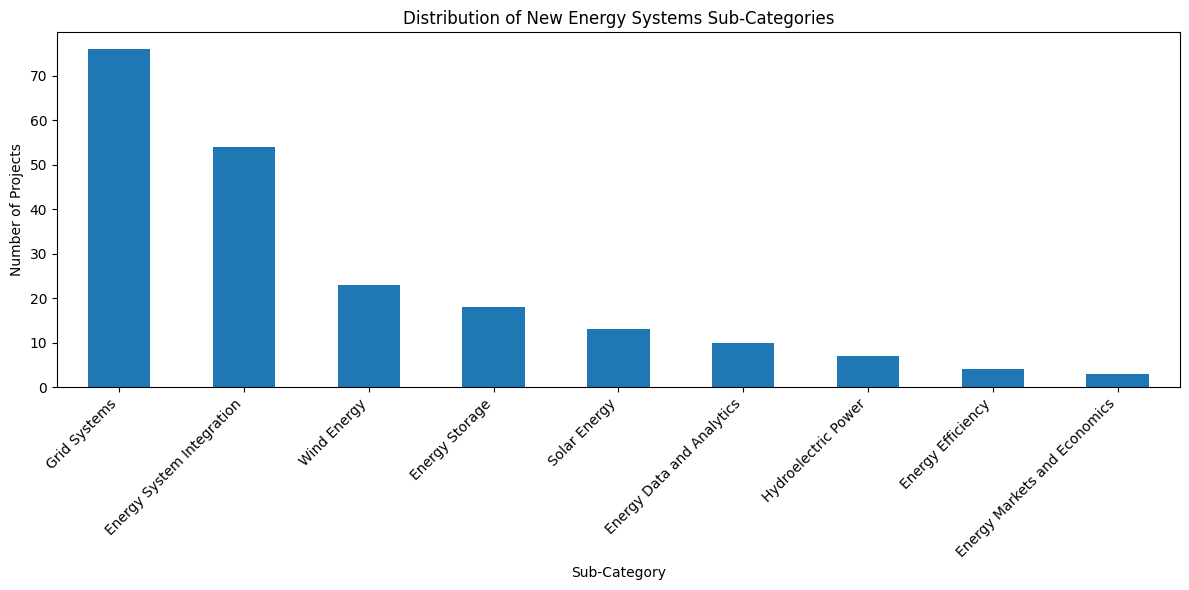

In [53]:
# Visualize the new sub-category distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
energy_subcategory_distribution.plot(kind='bar')
plt.title('Distribution of New Energy Systems Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [54]:
energy_subcategory_distribution

new_energy_subcategory
Grid Systems                    76
Energy System Integration       54
Wind Energy                     23
Energy Storage                  18
Solar Energy                    13
Energy Data and Analytics       10
Hydroelectric Power              7
Energy Efficiency                4
Energy Markets and Economics     3
Name: count, dtype: int64

In [55]:
# Get top keywords for each new sub-category
def get_top_keywords(subcategory, n=10):
    texts = df[df['new_energy_subcategories'].apply(lambda x: subcategory in x)]['cleaned_text'].fillna('')
    words = [word for text in texts for word in preprocess_text(text).split()]
    return Counter(words).most_common(n)

# Print top keywords for each new sub-category
for subcategory in new_energy_subcategories.keys():
    print(f"\nTop 10 keywords for {subcategory}:")
    print(get_top_keywords(subcategory))

# Save the updated dataframe
# df.to_csv('updated_energy_systems_projects.csv', index=False)


Top 10 keywords for Solar Energy:


KeyError: 'new_energy_subcategories'

# 4. Unique Words



In [ ]:
from collections import Counter

# Tokenize text
tokenized_data = [nltk.word_tokenize(text) for text in df['cleaned_text']]

# lemmatize
tokenized_data = [lemmatize_tokens(tokens) for tokens in tokenized_data]

# count the occurrence of each token
token_counts = [Counter(tokens) for tokens in tokenized_data]

# combine the counts from all rows
combined_counts = sum(token_counts, Counter())

In [ ]:
# print the top 30 most common tokens
word_freq = combined_counts.most_common(300)
word_freq

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

In [ ]:
wc = WordCloud(background_color="white", max_words=300,width=3000,height=2000,relative_scaling=0.2)
wc.generate_from_frequencies(dict(word_freq))
plt.figure(figsize=(20,20))
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.show()

# 5. Unique Bigrams and Trigrams

In [ ]:
df['cleaned_text'].str.split()

In [ ]:
df['cleaned_text_bigrams'] = df['combined'].apply(lambda x: x.replace("\\n", " ")) # Replace \\n
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: ' '.join(x.lower() for x in str(x).split())) # Lowercase
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x)) # Remove HTML tags
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]',' ', x)) # Remove symbols
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: ' '.join(x for x in str(x).split() if len(x) > 3)) # Remove short words
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: ' '.join(x for x in str(x).split() if x.isalpha())) # Remove numbers
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in words_black_list_small)) # Remove words from blacklist
df['cleaned_text_bigrams'] = df['cleaned_text_bigrams'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in stpwords)) # Remove stopwords

In [ ]:
# Create list of words in the order in which they orignally appear
words = list(df['cleaned_text_bigrams'].str.split().apply(pd.Series).stack().reset_index(drop = True))

In [ ]:
# Most frequent bigrams
bigrams = (pd.Series(nltk.ngrams(words, 2)).value_counts()).to_frame()

In [ ]:
type(bigrams)

In [ ]:
bigrams.head(300)

In [ ]:
# This are the bigrams manually filtered to match to the OpenSustain.tech database
bigrams_ost = ["climate change","energy systems","power system","earth system","energy system","energy consumption","power systems","remote sensing","renewable energy","water quality","life cycle","radiative transfer","weather climate","integrated assessment","wind energy","earth science","carbon footprint","surface water","sustainable development","species distriibution","power plants","wind turbine", "electric vehicle","wind farm","carbon emiśsions","greenhouse emissions","greenhouse gases","electricity market","land surface","numerical weather","wind turbine", "energy storage","development goals","solar cells", "soil water", "energy resources", "solar energy","energy managment", "carbon intensity", "water balance", "soil moisture", "climate science", "environmental impacts", "climate models", "carbon cycle", "offshore wind", "energy sector", "energy information", "distributed energy", "impact climate", "weather prediction", "urban energy", "power consumption", "citizen science", "decision making", "atmospheric science", "water resources", "land cover", "circular economy", "biodivercity information", "global climate", "forest management", "hydrological models", "large eddy", "energy market", "forest carbon", "atmospheric oceanic", "solar radiation", "stock assessment","general circulation", "battery models", "weather forecasts", "climate scenarios", "environmental economic", "climate policy", "climate analysis", "climate carbon", "electricity generation", "energy policy", "power grid", "electricity system", "fisheries stock", "global weather", "cloud microphysics","storage systems","wind speed", "wind farms","public transport","solar thermal", "statisical downscaling", "future energy", "energy modeling", "energy generation", "environment climate","tree crown","climate downscaling","solar power","wildland fire","climate sciences","fossil fuel","global scale","impact assessment","energy resource","carbon dioxide","carbon nitrogen","ocean state","emissions energy","soil properties","shallow water","smart grid","water treatment","future climate","climate impacts","level rise","global soil","niche models","land use","costal ocean","heating cooling", "ecological niche", "energy usage", "weather radar","water flow","wave energy","heat pump","district heating","flood inundation","protected areas","smart meter","demand flexibility"," groundwater surface","bottom trawl","tropical cyclone","water management","water carbon","organic carbon","atmospheric composition","marine debris","fire spread","electrial grid","social environmental","atmospheric models","global change","plastic pollution","change analysis"]


In [ ]:
bigrams_ost

In [ ]:
# Most frequent trigrams
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:100]

In [ ]:
!wget https://raw.githubusercontent.com/sadielbartholomew/cf-standard-names-linguistics/master/data/all_cf_standard_names_for_table_v83_at_30_11_23.txt

In [ ]:
cf_file = open("all_cf_standard_names_for_table_v83_at_30_11_23.txt", "r")
cf_meta_data = cf_file.read().split("\n")
df_cf_meta = pd.DataFrame(cf_meta_data,columns =['description'])

In [ ]:
df_cf_meta

In [ ]:
df_cf_meta['description'] = df_cf_meta['description'].apply(lambda x: ' '.join(x.lower() for x in str(x).split())) # Lowercase
df_cf_meta['description'] = df_cf_meta['description'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x)) # Remove HTML tags
df_cf_meta['description'] = df_cf_meta['description'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]',' ', x)) # Remove symbols
df_cf_meta['description'] = df_cf_meta['description'].apply(lambda x: ' '.join(x for x in str(x).split() if len(x) > 3)) # Remove short words
df_cf_meta['description'] = df_cf_meta['description'].apply(lambda x: ' '.join(x for x in str(x).split() if x.isalpha())) # Remove numbers
df_cf_meta['description'] = df_cf_meta['description'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in words_black_list_large)) # Remove words from blacklist
df_cf_meta['description'] = df_cf_meta['description'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in stpwords)) # Remove stopwords

In [ ]:
# Tokenize text
tokenized_data = [nltk.word_tokenize(text) for text in df_cf_meta['description']]

# lemmatize
tokenized_data = [lemmatize_tokens(tokens) for tokens in tokenized_data]

# count the occurrence of each token
token_counts = [Counter(tokens) for tokens in tokenized_data]

# combine the counts from all rows
combined_counts = sum(token_counts, Counter())

In [ ]:
# print the top 30 most common tokens
word_freq = combined_counts.most_common(300)
word_freq


In [ ]:
words_cf_meta = list(df_cf_meta['description'].str.split().apply(pd.Series).stack().reset_index(drop = True))

In [ ]:
# Most frequent bigrams
bigrams = (pd.Series(nltk.ngrams(words_cf_meta, 2)).value_counts()).to_frame()

In [ ]:
bigrams.head(300)